In [1]:
from datetime import datetime
import json
import os
import sys
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

# Constants.
QUERY_TYPE = ['hashtag', 'username']

# Validate command-line arguments.
#args = sys.argv[1:]
#if (len(args) != 3):
#    print('Usage: {} <FILENAME> <{}> <QUERY>'.format(sys.argv[0], ','.join(QUERY_TYPE)))
#    sys.exit(1)

filename = "./data.json"
search_type = "hashtag" #args[1].lower()
query = "WalterScott" #args[2].lower()
n = 5

# Check that file exists and read from it.
#if (not os.path.isfile(filename)):
#    print('File "{}" not found'.format(filename))
#    sys.exit(1)

#if (search_type not in QUERY_TYPE):
#    print('Query type must be one of', QUERY_TYPE)
#    sys.exit(1)

#read_start = datetime.now()
#with open(filename, encoding="utf8") as tweet_file:
#    tweet_data = tweet_file.read()

#read_end = datetime.now()
#print('Read time:', read_end - read_start, 'ms')

# Parse into json.
#json_start = datetime.now()
#tweet_json = json.loads(tweet_data)
#json_end = datetime.now()
#print('JSON parse time:', json_end - json_start, 'ms')

tweet_pd = pd.read_json("./data.json", convert_dates = "False")

### 1. Find tweets with given Hashtag
- Number of tweets
- Tweets on given day/hour (filtering)

In [2]:
# Number of tweets
query_start = datetime.now()
if (search_type == 'hashtag'):
    hashtag_query = '#{}'.format(query)
    results = [t for t in tweet_pd['text'] if hashtag_query in t]
else:
    print('Unimplemented query type')
    sys.exit(1)
query_end = datetime.now()
print('Query time:', query_end - query_start)

print('Number of tweets with given Hashtag Query: {}'.format(len(results)))
print()

Query time: 0:00:00.170685
Number of tweets with given Hashtag Query: 190971



In [3]:
# Tweets on given day/hour (filtering)
date_time_query = "2015-04-17 18"
tweet_pd = tweet_pd.astype(str) 
data_1 = tweet_pd[tweet_pd['created_at'].str.startswith(date_time_query)]

hashtag_query = '#{}'.format(query)
results_1 = [t for t in data_1['text'] if hashtag_query in t]
    
print('Number of tweets with given Hashtag Query on {} : {}'.format(date_time_query,len(results_1)))
#print("Tweets:", results_1)

Number of tweets with given Hashtag Query on 2015-04-17 18 : 122


### 2.	Find users with given Hashtag: (Ikjot)
- Number of users (unique)
- Top ‘n’ users with given Hashtag (with max tweets)

dataframe with #WalterScott:       archivesource                                               text  \
1    twitter-search  RT @BBCNewsUS: South Carolina police officer i...   
2    twitter-search  RT @AC360: IÃ¢â‚¬â„¢m supposed to be really an...   
3    twitter-search  RT @etanthomas36: RIP #WalterScott\nMaybe afte...   
4    twitter-search  RT @iBChrisMoses: Oh Jesus. RT @Bipartisanism:...   
5    twitter-search  shooting/killing a human fr such a simple viol...   
..              ...                                                ...   
96   twitter-search  RT @deray: And here is the front page of today...   
97   twitter-search  RT @Aidy_B_: Servir son pays, ÃƒÂªtre pÃƒÂ¨re,...   
98   twitter-search  RT @CCPNews: BREAKING: #WalterScott protesters...   
99   twitter-search  RT @elonjames: NEW @TWIBprime: Breaking down t...   
100  twitter-search  RT @3CarryOnItems: Good luck RT @Bipartisanism...   

    to_user_id        from_user                  id from_user_id  \
1             

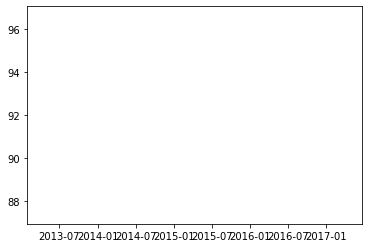

In [7]:
# converting to datetime type and extracting date part from it
#df1 = tweet_pd.copy(deep=True)
df1 = tweet_pd.truncate(before=1, after=100)
df1['created_at']= pd.to_datetime(df1['created_at'])
df1['date'] = df1['created_at'].dt.date

def hashtag(hashtag_query):
    unique_users = []
    results = df1[df1['text'].str.contains(hashtag_query)] #dataframe with given hashtags
    No_of_tweets = results['text'].count() # no of tweets with certain #
    users_list = results['from_user'].tolist()
    top_users = results['from_user'].value_counts()[:6] #top 5 users interms of frequency of #
    for w in users_list:
        if w not in unique_users:  #finding unique users
            unique_users.append(w)
        total_users_given_hashtag = len(unique_users)    
    print(f'dataframe with {hashtag_query}:',results)
    print()
    print(len(users_list))
    print()
    print('total unique users:',total_users_given_hashtag)
    print()
    print('top 5 users in terms of frequency', top_users)

#visualizing number of unique users for a given hastag on a specific day.
def visualize_unique_users(df1):
    df_unq_users = df1[['date','from_user']]
    grouped_df = df_unq_users.groupby("date")
    grouped_df = grouped_df.agg({"from_user": "nunique"})
    grouped_df = grouped_df.reset_index()
    date = grouped_df['date'].tolist()
    from_user = grouped_df['from_user'].tolist()
    plt.plot(date,from_user)
    plt.plot()

hashtag(hashtag_query)
visualize_unique_users(df1)

### 3. Find days/number of days given Hashtag trended (highest tweets per day)

In [8]:
# Days
data_2 = [t[:10] for t in tweet_pd['created_at']]
days = np.array(list(set(data_2)))
inter_new = [int(i[8:10]) for i in days]
days_order = days[np.argsort(inter_new)]

# Hours in a day
data_2 = [t[:13] for t in tweet_pd['created_at']]
days = np.array(list(set(data_2)))
inter_new = [(((int(i[8:10])-1)*25) + int(i[11:13])) for i in days]
days_hour_order = days[np.argsort(inter_new)]

In [9]:
# 3. Find number of days(hours) given hashtag trended
trend_info = []
for day_hour in days_order:
    day_info = {}
    data_pd = tweet_pd[tweet_pd['created_at'].str.startswith(day_hour)]
    for i in data_pd['text']:
        tweet_data = []
        tweet_data = [i for i in i.split() if i.startswith('#')]
        for j in tweet_data:
            if j in day_info:
                day_info[j] += 1
            else:
                day_info[j] = 1
    
    number = max(day_info.values())
    hashtag = list(day_info.keys())[list(day_info.values()).index(number)]
    
    trend_info.append([day_hour, hashtag, number])

In [10]:
for i in trend_info:
    if hashtag_query in i[1]:
        print("{} hashtag trended on: {}".format(hashtag_query,i[0]))

#WalterScott hashtag trended on: 2015-04-09
#WalterScott hashtag trended on: 2015-04-10
#WalterScott hashtag trended on: 2015-04-11
#WalterScott hashtag trended on: 2015-04-12
#WalterScott hashtag trended on: 2015-04-13
#WalterScott hashtag trended on: 2015-04-14
#WalterScott hashtag trended on: 2015-04-15
#WalterScott hashtag trended on: 2015-04-17


### 4.	Visualize number of users/tweets with given Hashtag vs days

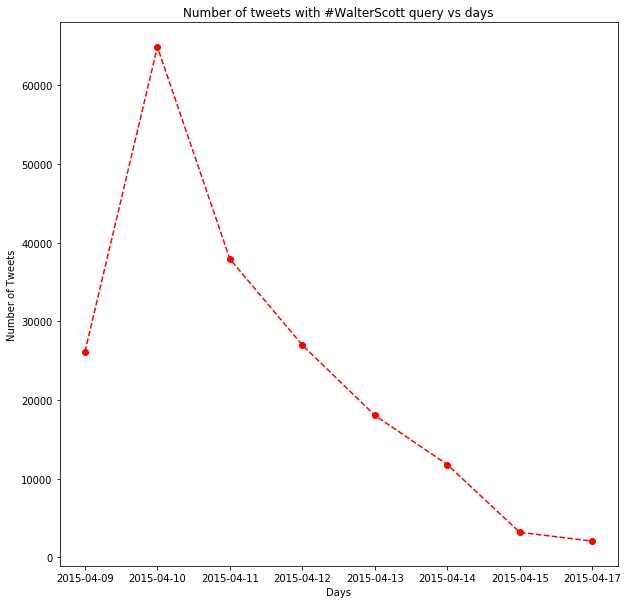

In [11]:
# Tweets with query vs day_hour
tweets_day = []
for i in days_order:
    data_3 = tweet_pd[tweet_pd['created_at'].str.startswith(i)]
    count = len([t for t in data_3['text'] if hashtag_query in t])
    tweets_day.append(count)
    
plt.figure(figsize=(10, 10))
plt.plot(days_order, tweets_day, 'ro', days_order, tweets_day, 'r--')
plt.xlabel("Days")
plt.ylabel("Number of Tweets")
plt.title("Number of tweets with {} query vs days".format(hashtag_query))
plt.show()